# Muestreo de Thompson

## Importamos nuestras Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importamos nuestro Conjunto de Datos

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementamos el muestreo de Thompson

In [3]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

## Visualisamos los resultados en un Histograma

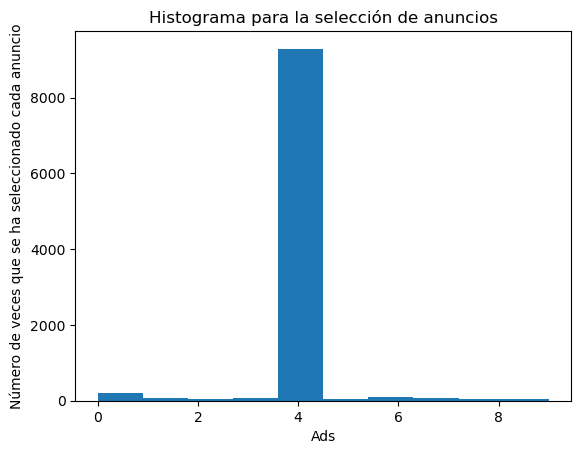

In [4]:
plt.hist(ads_selected)
plt.title('Histograma para la selección de anuncios')
plt.xlabel('Ads')
plt.ylabel('Número de veces que se ha seleccionado cada anuncio')
plt.show()